# Quantum Computing - Qiskit

#### Made By : Gaurav Baweja
##### Source : https://github.com/Aanvikshiki/Quantum_Computing

### Run Quantum circuit on live Quantum server

In [1]:
from qiskit import IBMQ

In [16]:
IBMQ.providers()
#https://quantum-computing.ibm.com/
#Craete account on IBM from above link and Paste 'YOUR-IBM-API-TOKEN'
IBMQ.save_account('YOUR-IBM-API-TOKEN',overwrite=True)

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>


Total count for 00 and 11 are: {'00': 503, '11': 497}


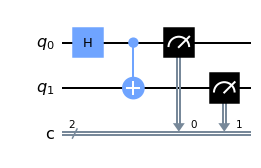

In [7]:
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw(output='mpl')

In [8]:
provider = IBMQ.get_provider('ibm-q')

In [9]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [10]:
qcomp = provider.get_backend('ibmq_lima')

In [11]:
job = execute(circuit, backend=qcomp)

In [12]:
from qiskit.tools.monitor import job_monitor

In [13]:
job_monitor(job)

Job Status: job has successfully run


In [14]:
result = job.result()

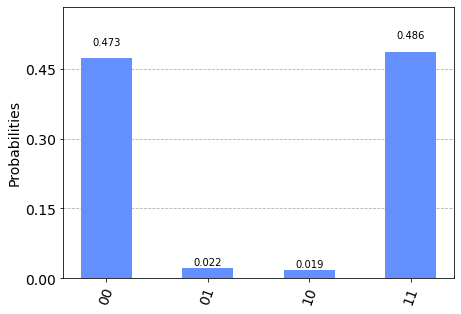

In [15]:
plot_histogram(result.get_counts(circuit))